In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
# Ensure 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is uploaded to your environment
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric, replacing empty spaces with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with the mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Drop the unique identifier as it provides no predictive value
df = df.drop('customerID', axis=1)

In [6]:
# Convert the target variable 'Churn' to 1 (Yes) and 0 (No)
# We use a mapping to prevent errors if the cell is run multiple times
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Use One-Hot Encoding for all other categorical text columns
# This converts text categories into 1s and 0s
df_final = pd.get_dummies(df, drop_first=True)


In [8]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Stratify=y ensures both sets have a balanced ratio of churners vs. stayers
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# Logistic Regression performs better when numerical data is on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# We increase max_iter to 2000 to avoid ConvergenceWarnings
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

--- MODEL PERFORMANCE ---
Accuracy Score: 80.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



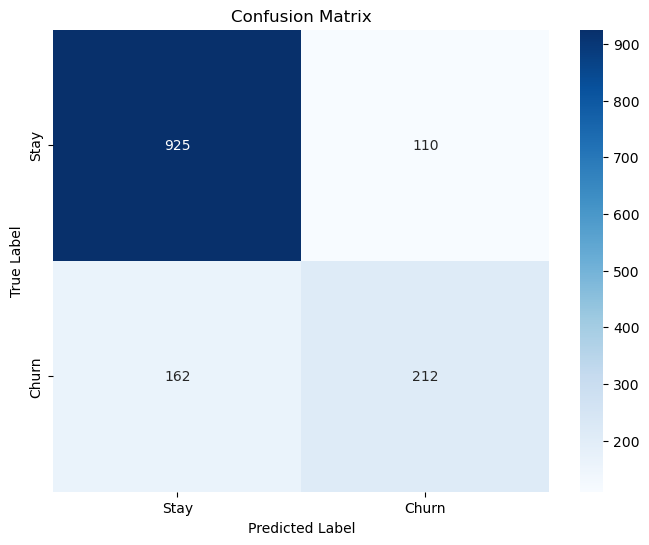

In [14]:
y_pred = model.predict(X_test_scaled)

print("--- MODEL PERFORMANCE ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Extract coefficients to see which features drive churn the most
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("\n--- TOP 5 DRIVERS OF CHURN ---")
print(importance.head(5))

print("\n--- TOP 5 DRIVERS OF RETENTION (STAYING) ---")
print(importance.tail(5))